In [2]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import  seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#second pad
train_df = pd.read_csv('./train_BRCpofr.csv')
test_df = pd.read_csv('./test_koRSKBP.csv')

In [3]:
train_df.head(3)

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212


In [4]:
rows,cols=train_df.shape[0],train_df.shape[1]
print('Number of rows in training data:',rows)
print('Number of columns in training data:',cols)

Number of rows in training data: 89392
Number of columns in training data: 12


In [5]:
rows,cols=test_df.shape[0],test_df.shape[1]
print('Number of rows in testing data:',rows)
print('Number of columns in testing data:',cols)

Number of rows in testing data: 59595
Number of columns in testing data: 11


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              89392 non-null  int64 
 1   gender          89392 non-null  object
 2   area            89392 non-null  object
 3   qualification   89392 non-null  object
 4   income          89392 non-null  object
 5   marital_status  89392 non-null  int64 
 6   vintage         89392 non-null  int64 
 7   claim_amount    89392 non-null  int64 
 8   num_policies    89392 non-null  object
 9   policy          89392 non-null  object
 10  type_of_policy  89392 non-null  object
 11  cltv            89392 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 8.2+ MB


In [7]:
print('Number of null values in training data:',train_df.isnull().sum().sum())
print('Number of null values in testing data:',test_df.isnull().sum().sum())

Number of null values in training data: 0
Number of null values in testing data: 0


In [8]:
print('Unique data types:\n',train_df.dtypes.value_counts())

Unique data types:
 object    7
int64     5
dtype: int64


In [9]:
print('Unique values in training data:\n',train_df.nunique())

Unique values in training data:
 id                89392
gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64


In [10]:
train_df = train_df.set_index('id')
test_df = test_df.set_index('id')
print('Setting id as the index column:')
train_df.head(3)

Setting id as the index column:


,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
id,,,,,,,,,,,
1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212


In [11]:
print('Seperating CAtegorical and Numerical columns:')
num = [i for i in train_df.select_dtypes(exclude='object').columns]
cat = [i for i in train_df.select_dtypes(include='object').columns]
print('Categorical Columns:\n',cat)
print('Numerical Columns:\n',num)

Seperating CAtegorical and Numerical columns:
Categorical Columns:
 ['gender', 'area', 'qualification', 'income', 'num_policies', 'policy', 'type_of_policy']
Numerical Columns:
 ['marital_status', 'vintage', 'claim_amount', 'cltv']


In [12]:
########### Function for PLOTTING OBJECT features ################
def cat_plot(feature,data=train_df):
    fig,axes = plt.subplots(1,2,figsize=(15,8))
    ax=axes[0]
    ax=plt.subplot(1,2,1)
    ax = sns.countplot(data=data,x=feature)
    for p in ax.patches:
        ax.text(p.get_x(),p.get_height(),p.get_height())
    plt.xlabel(feature)
    plt.ylabel('Counts')
    plt.title('Counts')
    
    ax=axes[1]
    ax=plt.subplot(1,2,2)
    g = train_df.groupby(feature)['cltv'].median()
    ax = plt.bar(g.index,g.values,color=['blue','red','green','yellow','pink'])
    plt.bar_label(ax,label_type='center')
    plt.xlabel('Classes')
    plt.ylabel('Average clvt for the classes')
    plt.title('Relation with clvt')
    plt.show()
    
    return True

For feature gender:

----------------------------------------------------------------------------------------------------


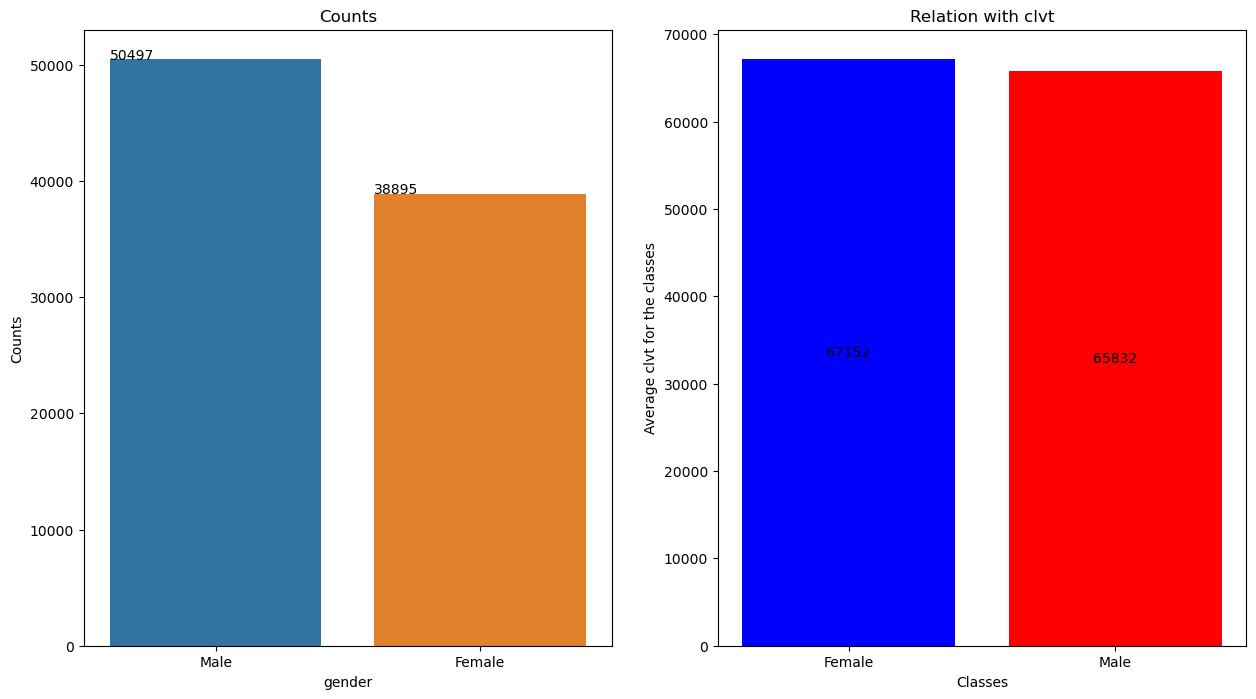

----------------------------------------------------------------------------------------------------
For feature area:

----------------------------------------------------------------------------------------------------


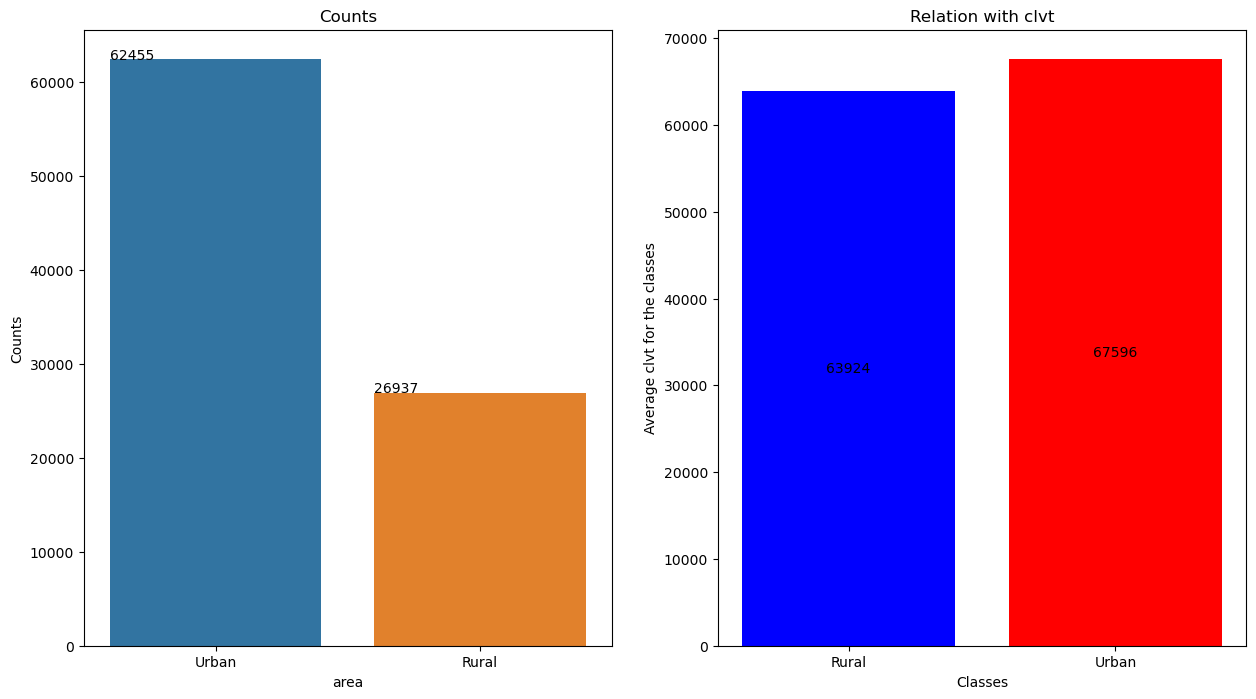

----------------------------------------------------------------------------------------------------
For feature qualification:

----------------------------------------------------------------------------------------------------


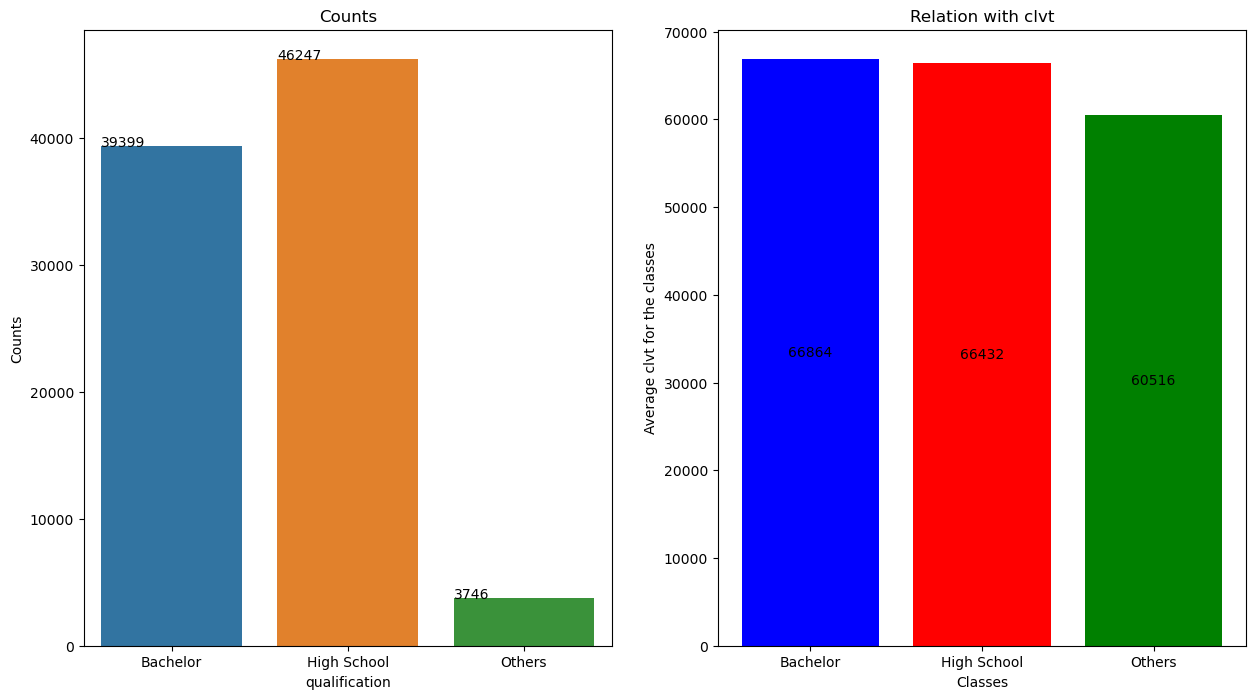

----------------------------------------------------------------------------------------------------
For feature income:

----------------------------------------------------------------------------------------------------


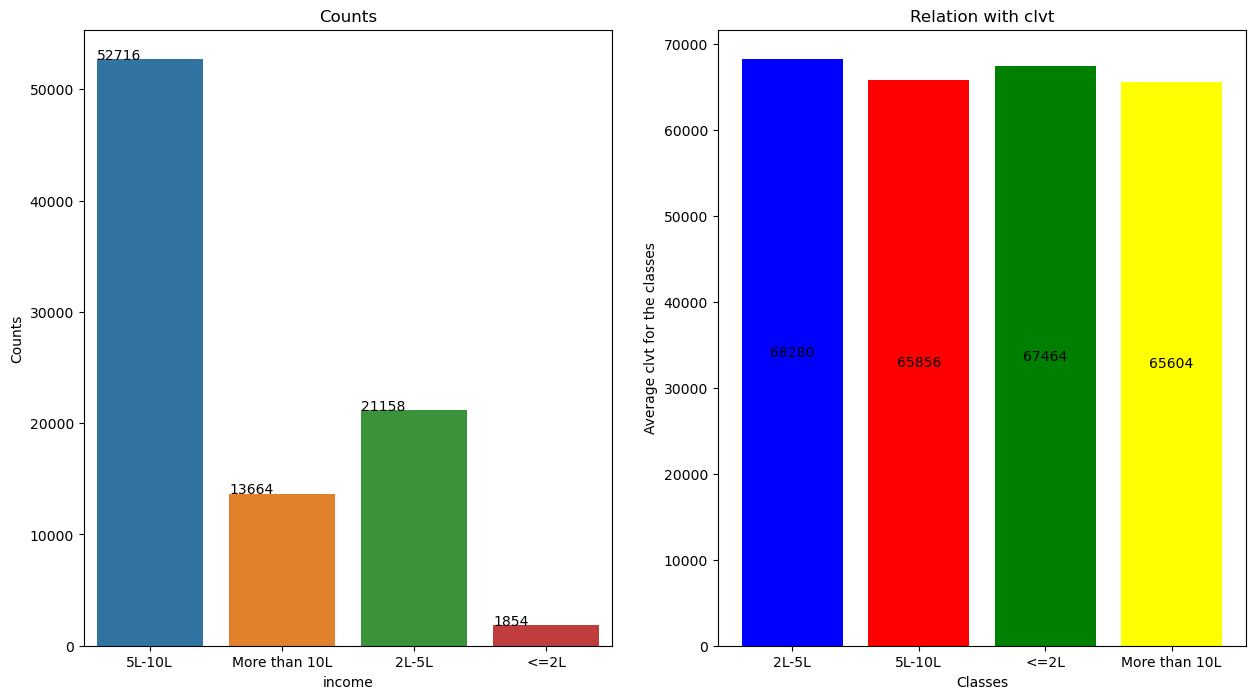

----------------------------------------------------------------------------------------------------
For feature num_policies:

----------------------------------------------------------------------------------------------------


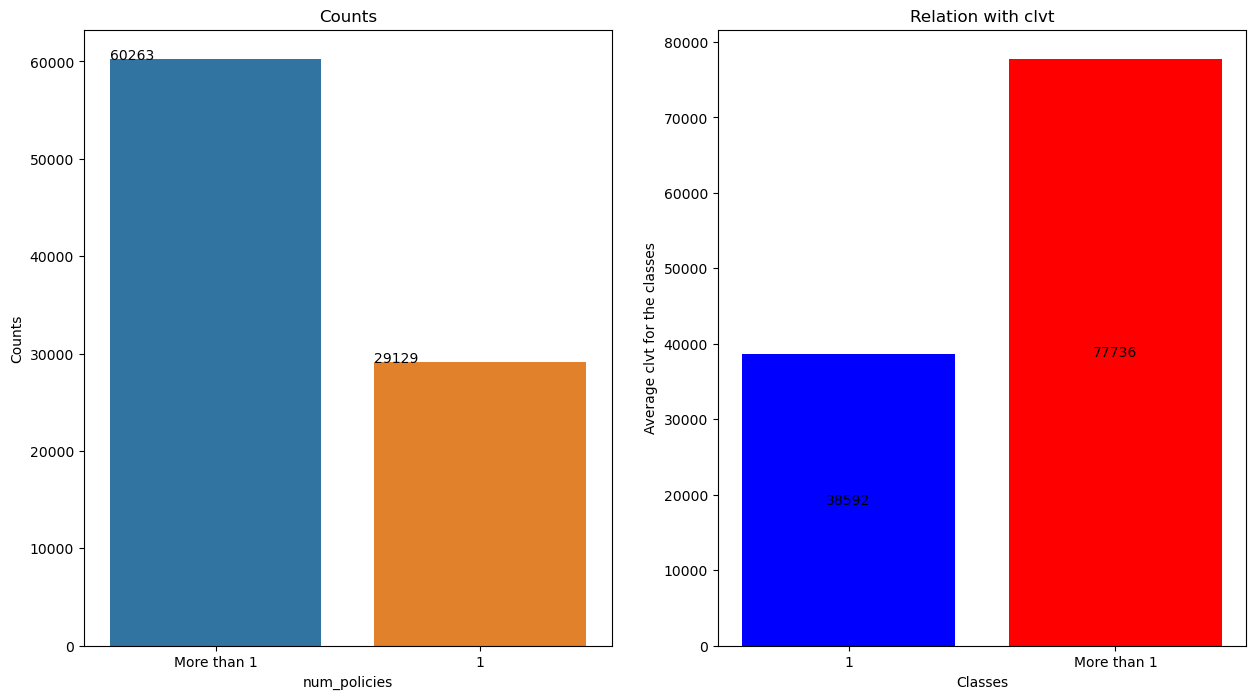

----------------------------------------------------------------------------------------------------
For feature policy:

----------------------------------------------------------------------------------------------------


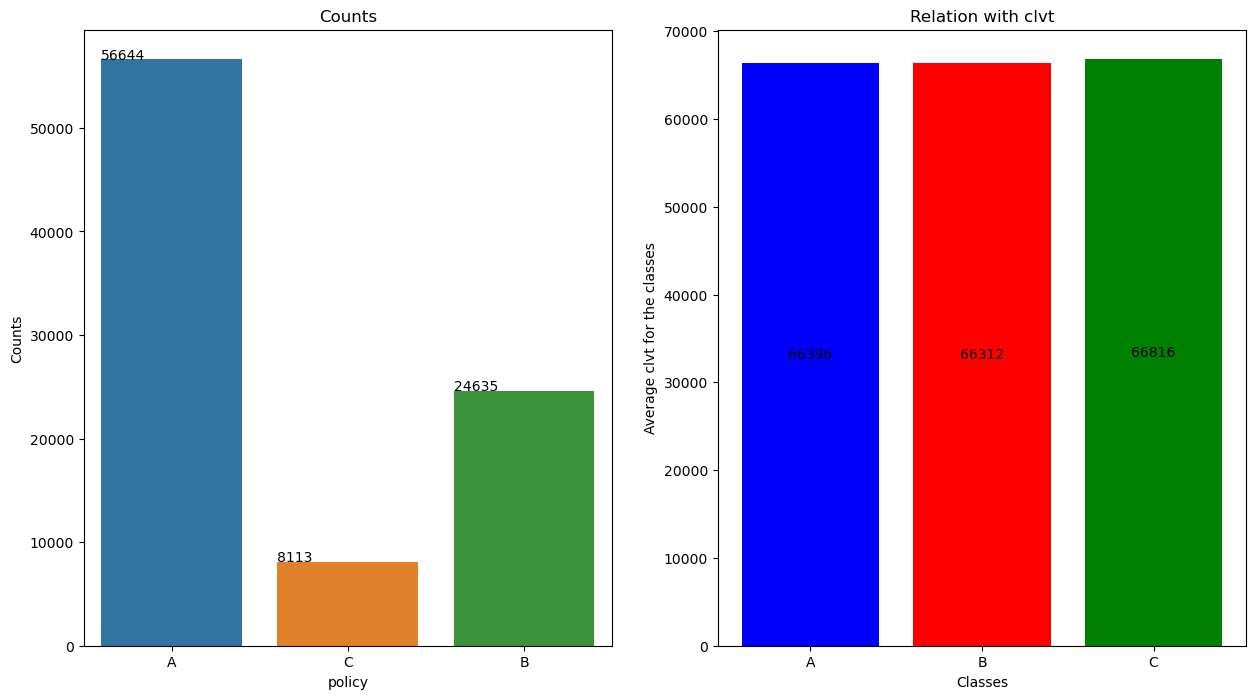

----------------------------------------------------------------------------------------------------
For feature type_of_policy:

----------------------------------------------------------------------------------------------------


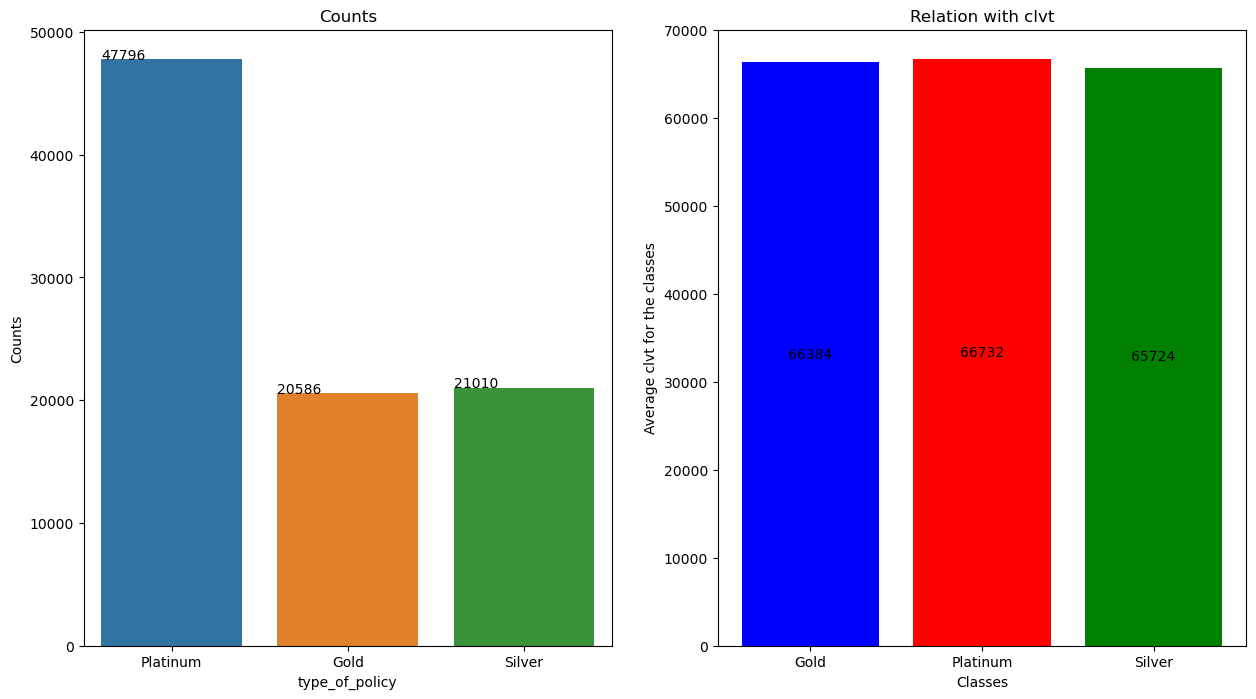

----------------------------------------------------------------------------------------------------
################################################Finished################################################


In [13]:
# Visualise Categorical Features
for feature in cat:
    print(''*50+'For feature {}:\n'.format(feature))
    print('-'*100)
    if cat_plot(feature):
        print('-'*100)
print('#'*48 +'Finished'+ '#'*48)

In [14]:
########### Function for PLOTTING NUMERIC features ################
import random

def num_plot(feature,data=train_df):
    fig,axes = plt.subplots(1,2,figsize=(15,8))
    ax=axes[0]
    ax=plt.subplot(1,2,1)
    ax = sns.distplot(x=data[feature])
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.title('Distribution plot')
    
    color = ['blue','red','green','yellow','pink','orange']
    ax=axes[1]
    ax=plt.subplot(1,2,2)
    ax = plt.scatter(train_df[feature],train_df['cltv'],c=color[random.randint(0,5)])
    plt.xlabel(feature)
    plt.ylabel('CLVT')
    plt.title('Relation with clvt')
    plt.show()
    
    return True

For feature marital_status:

----------------------------------------------------------------------------------------------------


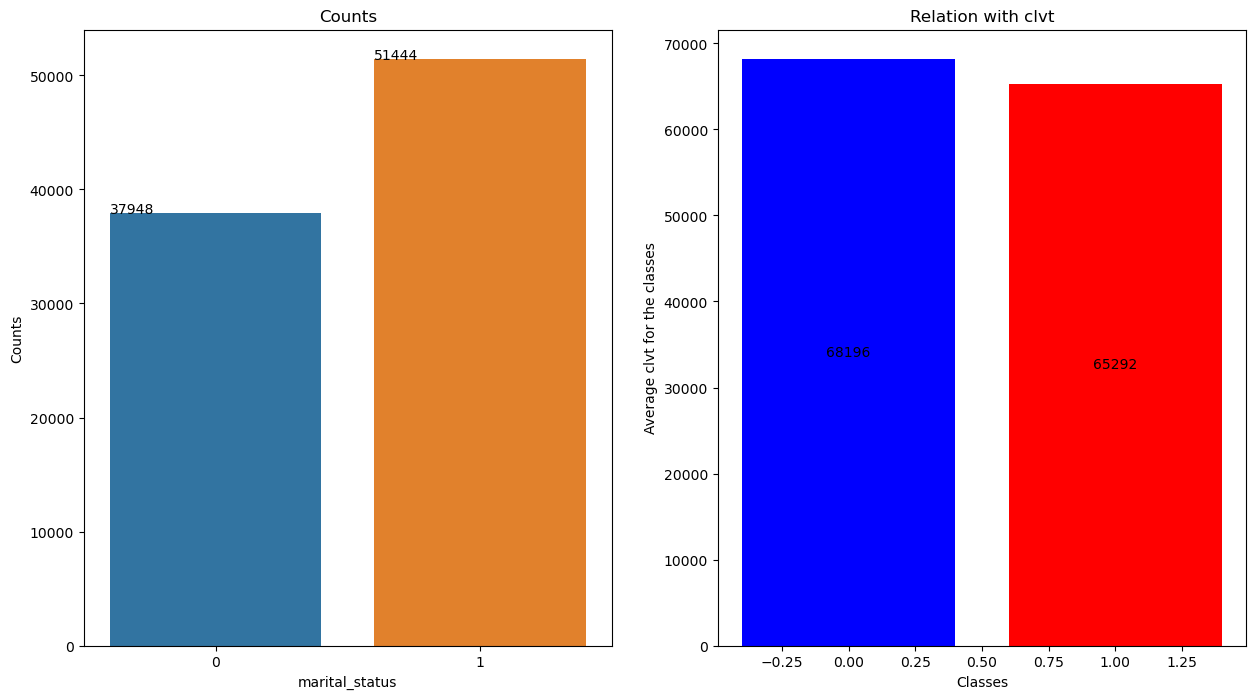

----------------------------------------------------------------------------------------------------
For feature vintage:

----------------------------------------------------------------------------------------------------


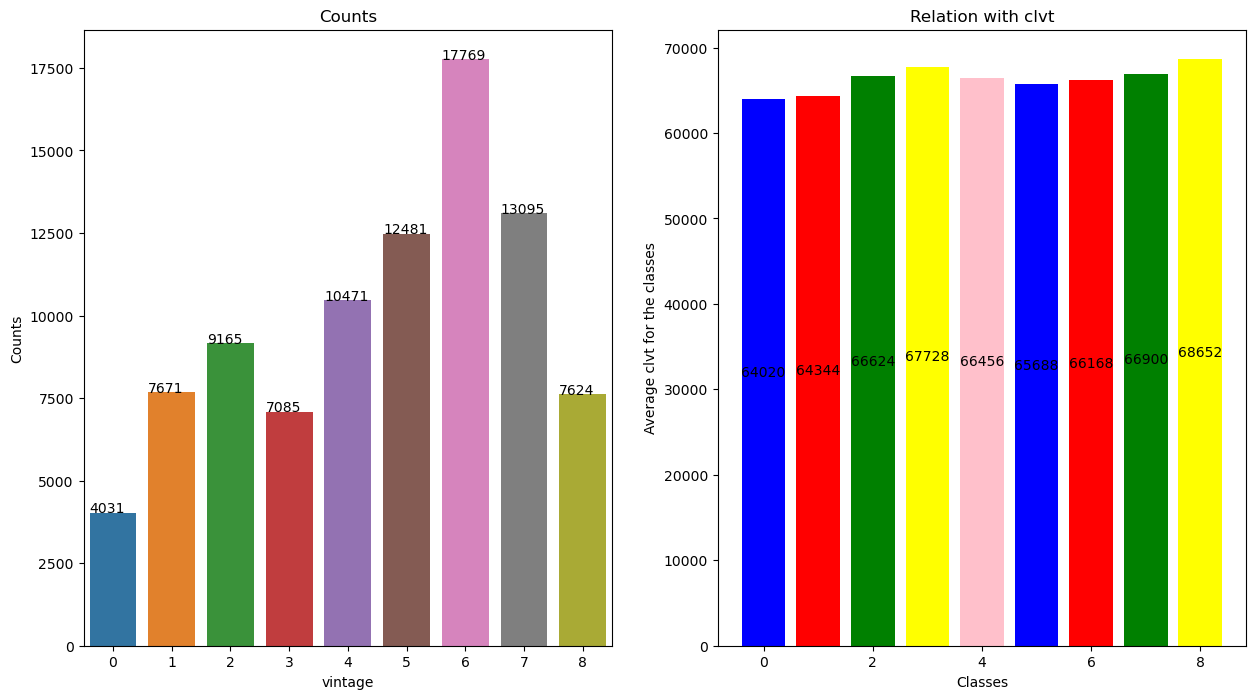

----------------------------------------------------------------------------------------------------
For feature claim_amount:

----------------------------------------------------------------------------------------------------


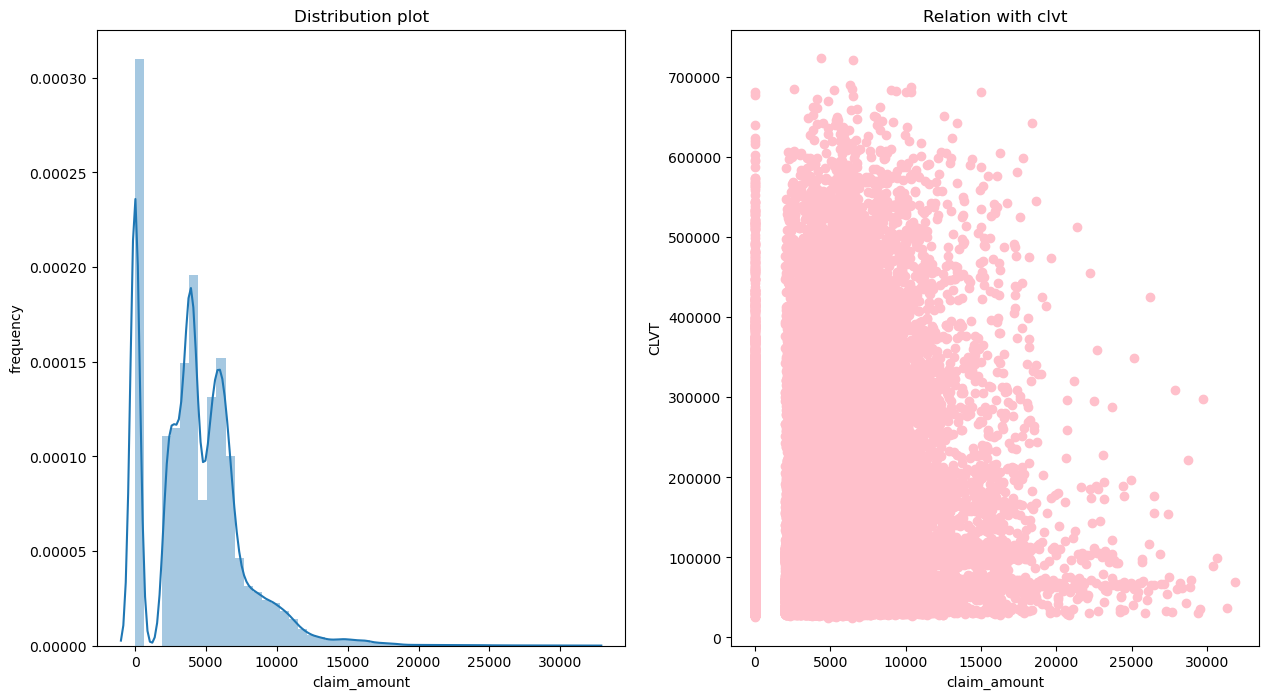

----------------------------------------------------------------------------------------------------
For feature cltv:

----------------------------------------------------------------------------------------------------


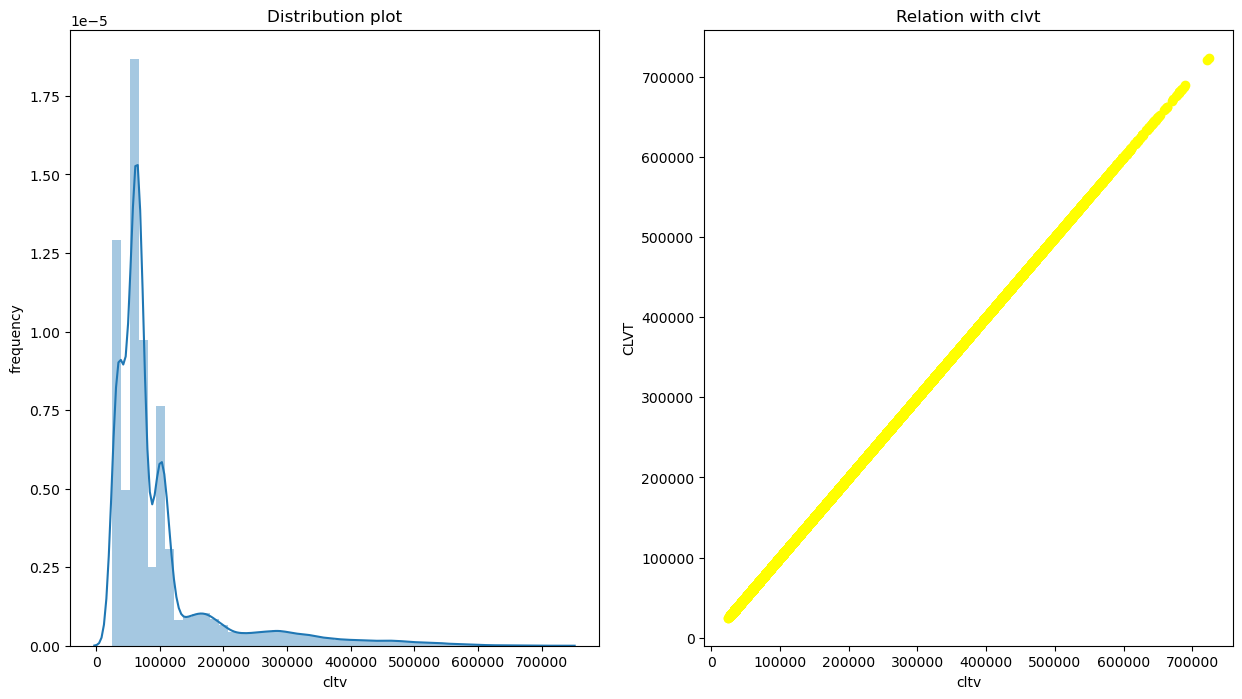

----------------------------------------------------------------------------------------------------
################################################Finished################################################


In [15]:
# Visualise Numerical Features
for feature in num:
    if train_df[feature].nunique()<10:
        print(''*50+'For feature {}:\n'.format(feature))
        print('-'*100)
        if cat_plot(feature):
            print('-'*100)
        
    else:
        print(''*50+'For feature {}:\n'.format(feature))
        print('-'*100)
        if num_plot(feature):
            print('-'*100)
print('#'*48 +'Finished'+ '#'*48)

In [16]:
for i in num:
    print('Standard Deviation of {} is  ----> {} '.format(i,train_df[i].std()))

Standard Deviation of marital_status is  ----> 0.49427151865795943 
Standard Deviation of vintage is  ----> 2.290445718577729 
Standard Deviation of claim_amount is  ----> 3262.359775192034 
Standard Deviation of cltv is  ----> 90613.81479334325 


<AxesSubplot:>

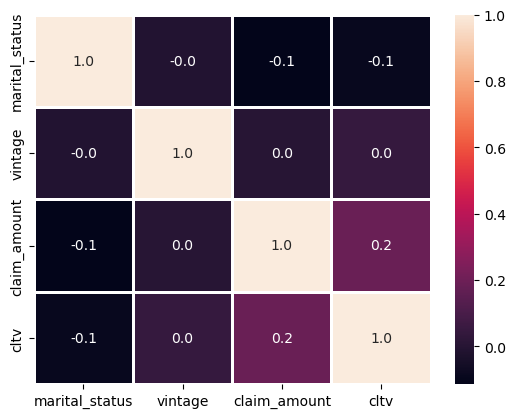

In [17]:
#Visualising Correlation matrix
mat = train_df.corr(method='spearman')
sns.heatmap(mat,annot=True,linewidths=1,fmt='.1f')

In [18]:
corr_dict = {}
for col in cat:
    corr = train_df['cltv'].corr(train_df[col], method='spearman')
    corr_dict[col] = corr
    
for feature,value in corr_dict.items():
    print('Correlation of {} with cltv is ----> {}'.format(feature,value))

Correlation of gender with cltv is ----> -0.03517327160575323
Correlation of area with cltv is ----> 0.13173320853250184
Correlation of qualification with cltv is ----> -0.03628558857905113
Correlation of income with cltv is ----> -0.0676155067839568
Correlation of num_policies with cltv is ----> 0.6213982999511313
Correlation of policy with cltv is ----> -0.010516034094255462
Correlation of type_of_policy with cltv is ----> -0.025592671372610214


In [19]:
print('Shape of training data before encoding: ',train_df.shape)
data = train_df.copy()
test = test_df.copy()
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

print('Shape of training data after OneHot encoding: ',train_df.shape)

Shape of training data before encoding:  (89392, 11)
Shape of training data after OneHot encoding:  (89392, 23)


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [21]:
X = train_df.drop('cltv',1)
y = train_df['cltv']

In [22]:
# Data Normalization
X = np.array(X)
y = np.array(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
# 70 : 30 Split from training and testing
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=28)

In [24]:
linear = LinearRegression(n_jobs=-1)
linear.fit(x_train,y_train)
pred = linear.predict(x_test)
print('Accuracy: ',r2_score(y_test,pred))
print('Loss: ',mean_squared_error(y_test,pred))

Accuracy:  0.15001716147015798
Loss:  6973033309.105713


In [25]:
rfr = RandomForestRegressor(n_jobs=-1)
rfr.fit(x_train,y_train)
pred = rfr.predict(x_test)
print('Accuracy: ',r2_score(y_test,pred))
print('Loss: ',mean_squared_error(y_test,pred))

Accuracy:  0.02763273032982383
Loss:  7977042656.322131


In [26]:
xgb = XGBRegressor(n_jobs=-1)
xgb.fit(x_train,y_train)
pred = xgb.predict(x_test)
print('Accuracy: ',r2_score(y_test,pred))
print('Loss: ',mean_squared_error(y_test,pred))

Accuracy:  0.13380145043578728
Loss:  7106062692.815476


In [27]:
# Replace categorical values with mean cltv
for feature in cat:
    g = data.groupby(feature)['cltv'].mean()
    data[feature] = data[feature].replace(g)

In [29]:
X = data.drop('cltv',1)
y = data['cltv']
#Normolising of data
X = np.array(X)
y = np.array(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# 70 : 30 Split from training and testing
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=28)

In [30]:
linear = LinearRegression(n_jobs=-1)
linear.fit(x_train,y_train)
pred = linear.predict(x_test)
print('Accuracy: ',r2_score(y_test,pred))
print('Loss: ',mean_squared_error(y_test,pred))

Accuracy:  0.14984844154835308
Loss:  6974417442.503854


In [31]:
linear = LinearRegression(n_jobs=-1)
linear.fit(x_train,y_train)
pred = linear.predict(x_test)
print('Accuracy: ',r2_score(y_test,pred))
print('Loss: ',mean_squared_error(y_test,pred))
errors = y - linear.predict(X)
data['Step_1'] = errors

Accuracy:  0.14984844154835308
Loss:  6974417442.503854


In [32]:
X = data.drop('cltv',1)
y = data['cltv']

# Normalising data
X = np.array(X)
y = np.array(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# 70 : 30 Split from training and testing
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=28)

linear = LinearRegression(n_jobs=-1)
linear.fit(x_train,y_train)
pred = linear.predict(x_test)
print('Accuracy: ',r2_score(y_test,pred))
print('Loss: ',mean_squared_error(y_test,pred))
errors = y - linear.predict(X)
data['Step_2'] = errors

Accuracy:  1.0
Loss:  1.4357343973177906e-18


In [33]:
X = data.drop('cltv',1)
y = data['cltv']

# Normalising data
X = np.array(X)
y = np.array(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# 70 : 30 Split from training and testing
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=28)

linear = LinearRegression(n_jobs=-1)
linear.fit(x_train,y_train)
pred = linear.predict(x_test)
print('Accuracy: ',r2_score(y_test,pred))
print('Loss: ',mean_squared_error(y_test,pred))

Accuracy:  1.0
Loss:  6.552147335661673e-19


In [34]:
result = pd.DataFrame()

In [35]:
result['Actual'] = y_test
result['Predicted'] = linear.predict(x_test)
result['Loss'] = result.Actual - result.Predicted

In [36]:
result

,Actual,Predicted,Loss
0,67032,67032.0,-3.201421e-10
1,69816,69816.0,1.688022e-09
2,69072,69072.0,-1.746230e-10
3,115248,115248.0,1.251465e-09
4,61800,61800.0,-5.820766e-10
...,...,...,...
26813,62544,62544.0,1.673470e-10
26814,49068,49068.0,7.566996e-10
26815,69036,69036.0,1.105946e-09
26816,59388,59388.0,9.240466e-10
